In [36]:
from pprint import pprint
import csv
from requests import get
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
%matplotlib inline
sns.set_palette("gist_rainbow")

In [2]:
with open('opendata.csv','r',encoding='Windows-1251') as f:
    reader = pd.read_csv(f, sep=',',header=0)

reader

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235
...,...,...,...,...
74837,Средние траты в ресторане,Ярославская область,2018-07-15,1274
74838,Средние траты в ресторане,Ярославская область,2018-08-15,1263
74839,Средние траты в ресторане,Ярославская область,2018-09-15,1184
74840,Средние траты в ресторане,Ярославская область,2018-10-15,1181


In [3]:
reader['date'] = pd.to_datetime(reader['date'])

In [4]:
reader.dtypes

name              object
region            object
date      datetime64[ns]
value              int64
dtype: object

In [5]:
#reg = input('Введите регионы для выборки, через запятую: ').split(sep=',')

In [6]:
#search_name = input('Введите категорию: ')
search_name = 'Средние траты в ресторане'

In [7]:
pd.plotting.register_matplotlib_converters()

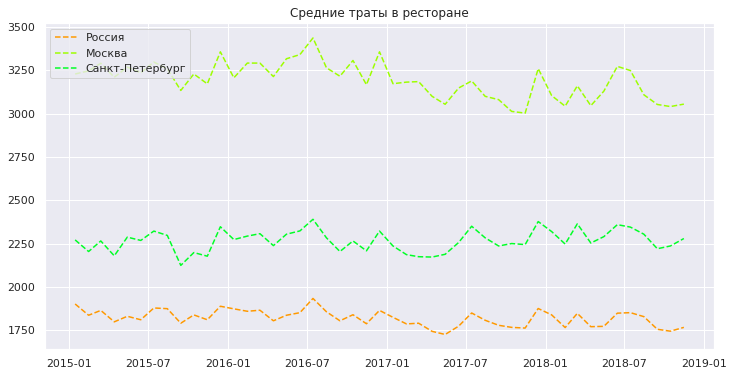

In [37]:
reg = ['Россия', 'Москва', 'Санкт-Петербург']
results = []
for i in range(len(reg)):
    globals()[f'result_{i}'] = reader.loc[(reader['region'] == reg[i]) & (reader['name'] == search_name)]
    results.append(globals()[f'result_{i}'])

plt.figure(figsize=(12, 6))   
for i in results:
    plt.plot(i['date'],i['value'], '--')
plt.title(search_name)
plt.legend(reg, loc='upper left');